In [18]:
# !pip install opencv-python
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [19]:
def processImage(image):
    image = cv2.imread(image)
    image = cv2.cvtColor(src=image, code= cv2.COLOR_BGR2GRAY)
    return image

def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[0]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output



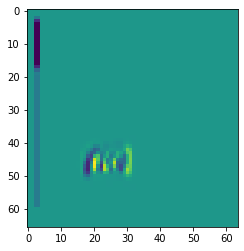

In [42]:
image = processImage('sc.png')

# Edge Detection Kernel
kernel = np.array([
    [-1, -1, -1],
 [-1, 8, -1], 
 [-1, -1, -1]])

# pair of sobel kernels (they are linearly separable)
k1 = np.transpose(np.array([
    [1,2,1]
]))
k2 = np.array([
    [-1,0,1]
])
# kernel =np.transpose(kernel)
# Convolve and Save Output
output = convolve2D(image, k1, padding=2)
output = convolve2D(output, k2, padding=2)
# output = convolve2D(image, kernel, padding=2)


plt.imshow(output)
plt.show()